In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:
data=pd.read_csv("thyroid_cancer_risk_data.csv")

In [54]:
data.isna().sum()

Patient_ID             0
Age                    0
Gender                 0
Country                0
Ethnicity              0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    0
Diagnosis              0
dtype: int64

In [55]:
data.duplicated().sum()

np.int64(0)

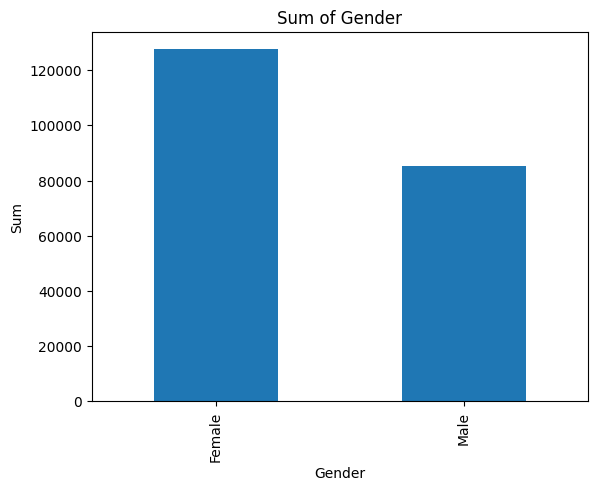

In [56]:
data["Gender"].value_counts().plot(kind="bar")
plt.title("Sum of Gender")
plt.xlabel("Gender")
plt.ylabel("Sum")
plt.show()

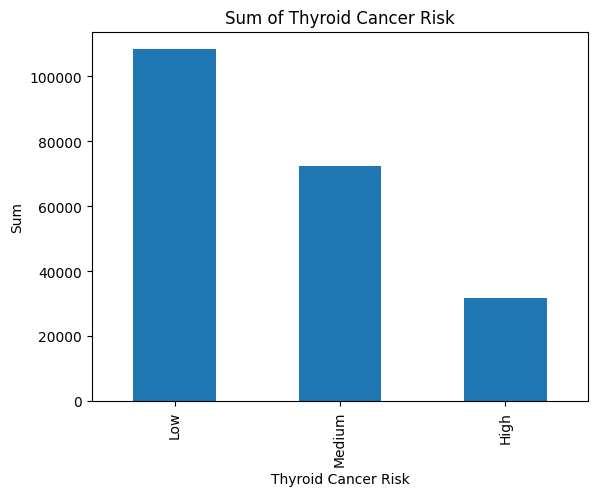

In [57]:
data["Thyroid_Cancer_Risk"].value_counts().plot(kind="bar")
plt.title("Sum of Thyroid Cancer Risk")
plt.xlabel("Thyroid Cancer Risk")
plt.ylabel("Sum")
plt.show()

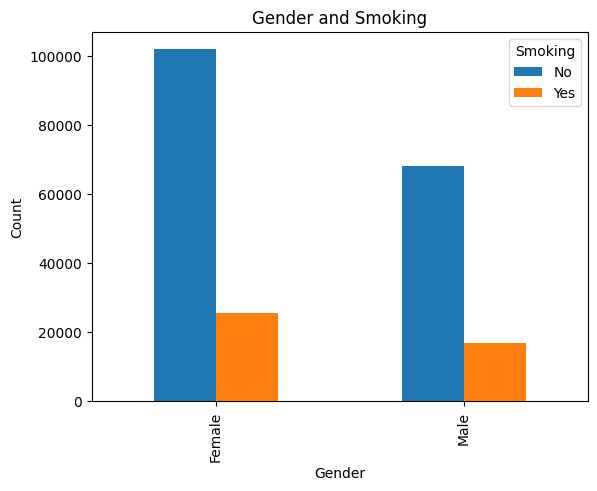

In [58]:
Gender_bay_smoking=data.groupby("Gender")["Smoking"].value_counts().unstack().plot(kind="bar")  
plt.title("Gender and Smoking")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

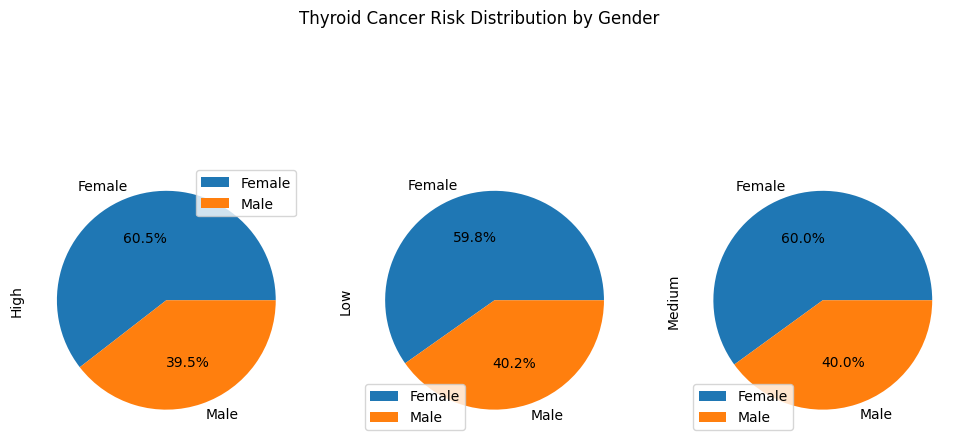

In [59]:
gender_risk_counts = data.groupby("Gender")["Thyroid_Cancer_Risk"].value_counts().unstack()

# Plot pie chart for each gender
gender_risk_counts.plot(kind="pie", subplots=True, autopct='%1.1f%%', figsize=(12, 6))

plt.suptitle("Thyroid Cancer Risk Distribution by Gender")
plt.show()


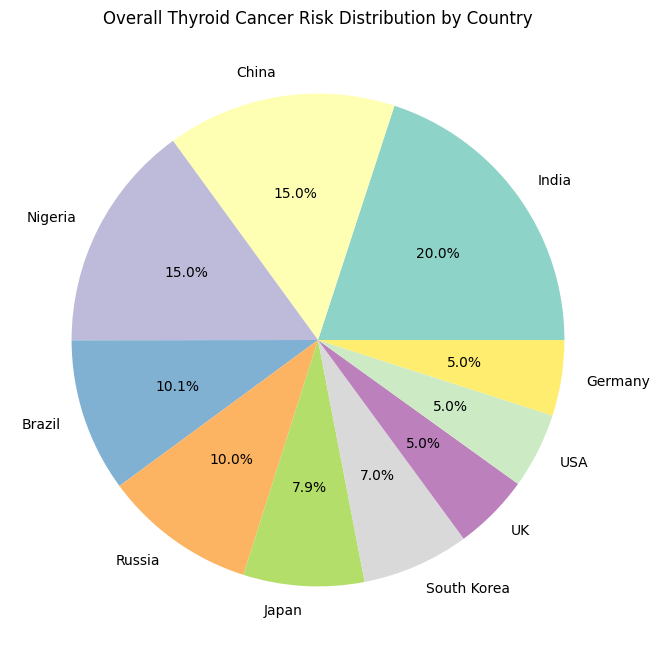

In [60]:
# Summing total cases per country
total_risk_counts = data["Country"].value_counts()

# Plot single pie chart
total_risk_counts.plot(kind="pie", autopct='%1.1f%%', figsize=(8, 8), colormap="Set3")
plt.title("Overall Thyroid Cancer Risk Distribution by Country")
plt.ylabel("")  # Hide y-label
plt.show()


In [61]:
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country', 'Ethnicity', 'Family_History',
       'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity',
       'Diabetes', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size',
       'Thyroid_Cancer_Risk', 'Diagnosis'],
      dtype='object')

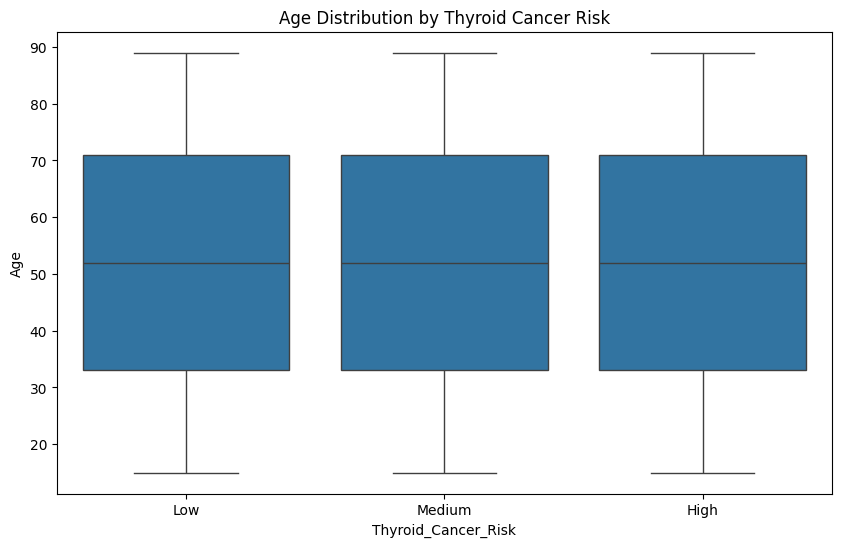

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Thyroid_Cancer_Risk", y="Age", data=data)
plt.title("Age Distribution by Thyroid Cancer Risk")
plt.show()

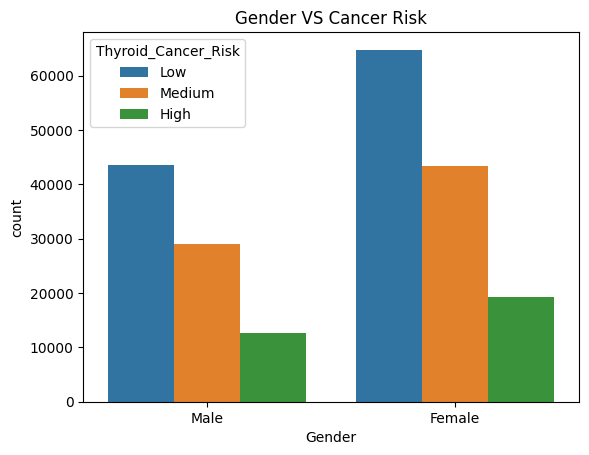

In [64]:
sns.countplot(x="Gender", hue="Thyroid_Cancer_Risk", data=data)
plt.title("Gender VS Cancer Risk")
plt.show()

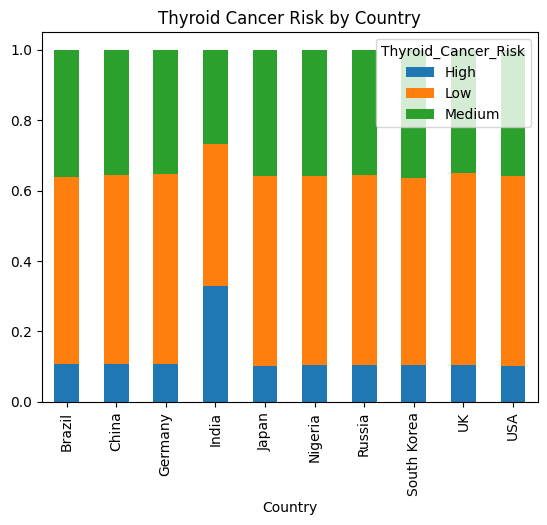

In [67]:
data.groupby("Country")["Thyroid_Cancer_Risk"].value_counts(normalize=True).unstack().plot(kind="bar", stacked=True)
plt.title("Thyroid Cancer Risk by Country")
plt.show()

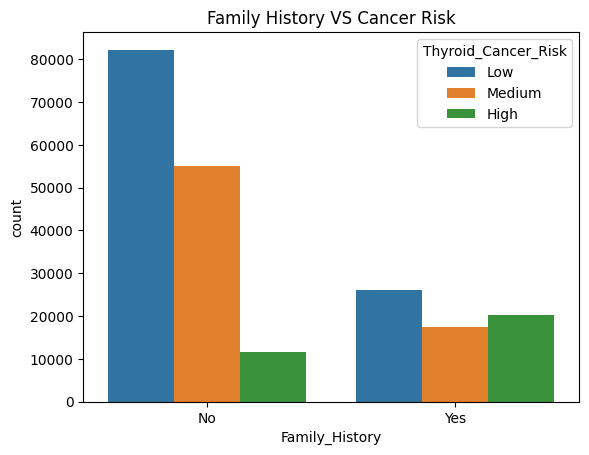

In [69]:
sns.countplot(x="Family_History", hue="Thyroid_Cancer_Risk", data=data)
plt.title("Family History VS Cancer Risk")
plt.show()

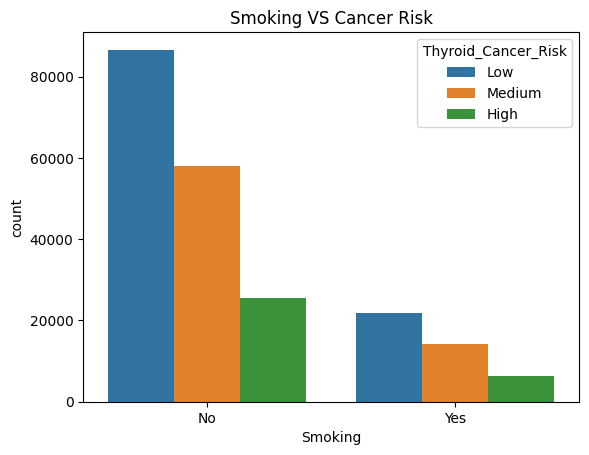

In [68]:
sns.countplot(x="Smoking", hue="Thyroid_Cancer_Risk", data=data)
plt.title("Smoking VS Cancer Risk")
plt.show()

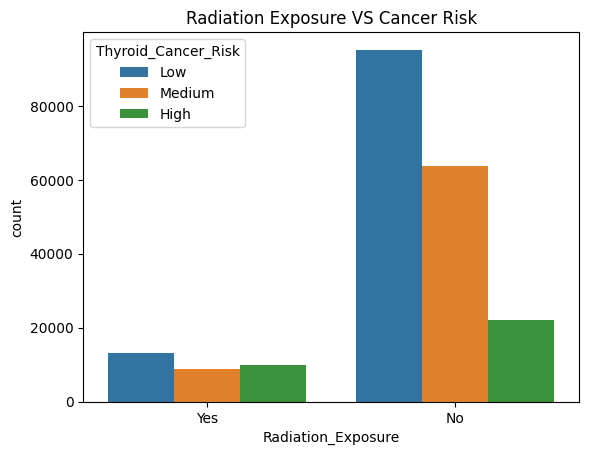

In [70]:
sns.countplot(x="Radiation_Exposure", hue="Thyroid_Cancer_Risk", data=data)
plt.title("Radiation Exposure VS Cancer Risk")
plt.show()

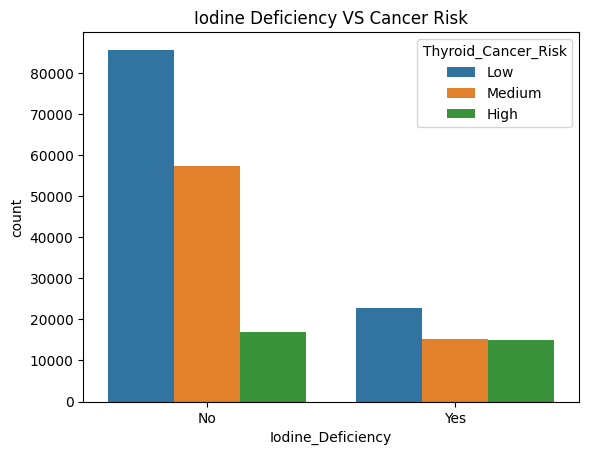

In [71]:
sns.countplot(x="Iodine_Deficiency", hue="Thyroid_Cancer_Risk", data=data)
plt.title("Iodine Deficiency VS Cancer Risk")
plt.show()

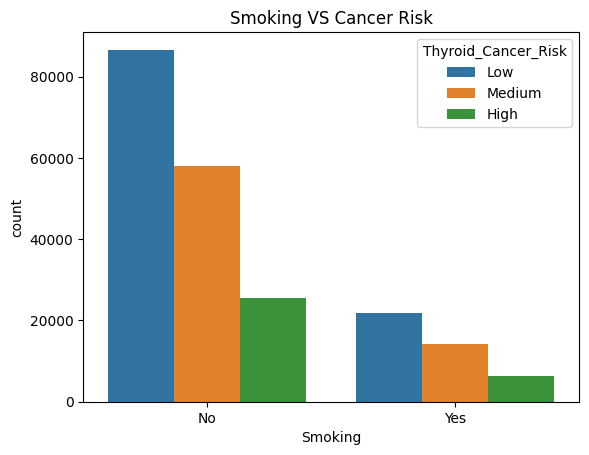

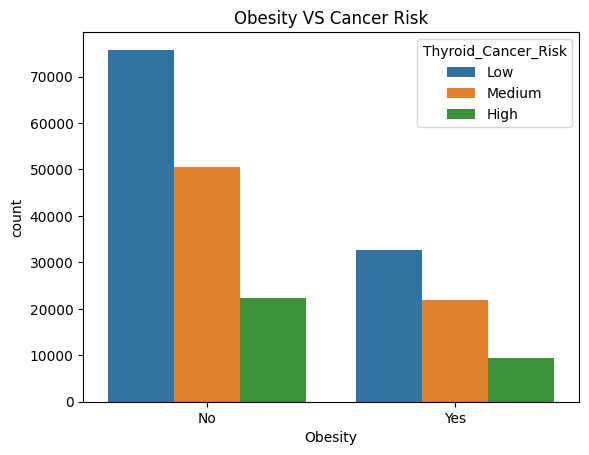

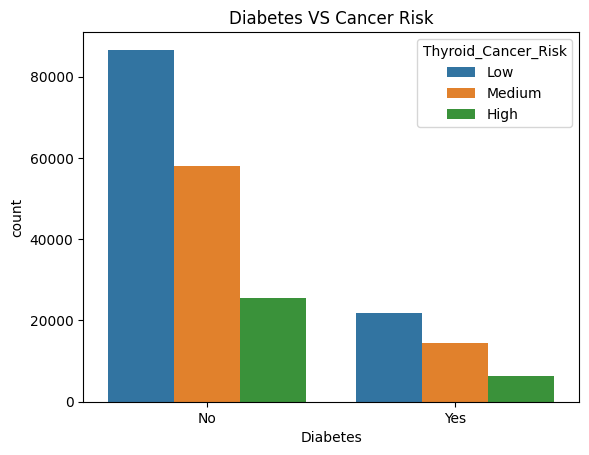

In [73]:
for col in ['Smoking', 'Obesity', 'Diabetes']:
    sns.countplot(x=col, hue='Thyroid_Cancer_Risk', data=data)
    plt.title(f"{col} VS Cancer Risk")
    plt.show()

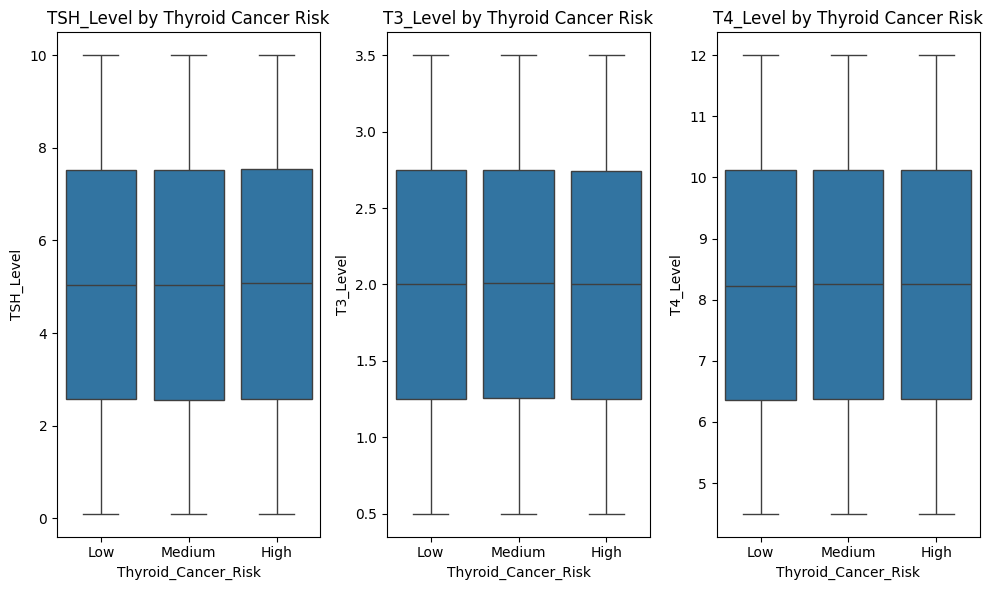

In [74]:
plt.figure(figsize=(10, 6)) 
for i, col in enumerate(["TSH_Level", "T3_Level", "T4_Level"]):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x="Thyroid_Cancer_Risk", y=col, data=data)
    plt.title(f"{col} by Thyroid Cancer Risk")
plt.tight_layout()
plt.show()

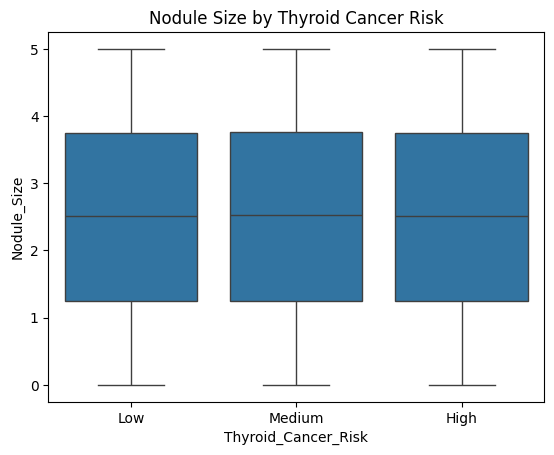

In [75]:
sns.boxplot(x="Thyroid_Cancer_Risk", y="Nodule_Size", data=data)
plt.title("Nodule Size by Thyroid Cancer Risk")
plt.show()

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

df_encoded = data.copy()

# Encode categorical columns
categorical_cols = ["Gender", "Country", "Ethnicity", "Family_History", "Radiation_Exposure", 
                    "Iodine_Deficiency", "Smoking", "Obesity", "Diabetes", "Thyroid_Cancer_Risk"]

encoder = LabelEncoder()

for col in categorical_cols:
    df_encoded[col] = encoder.fit_transform(df_encoded[col])

# Split data
X = df_encoded.drop(["Patient_ID", "Diagnosis"], axis=1)
y = df_encoded["Diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8243964362114765


<Axes: title={'center': 'Feature Importances'}>

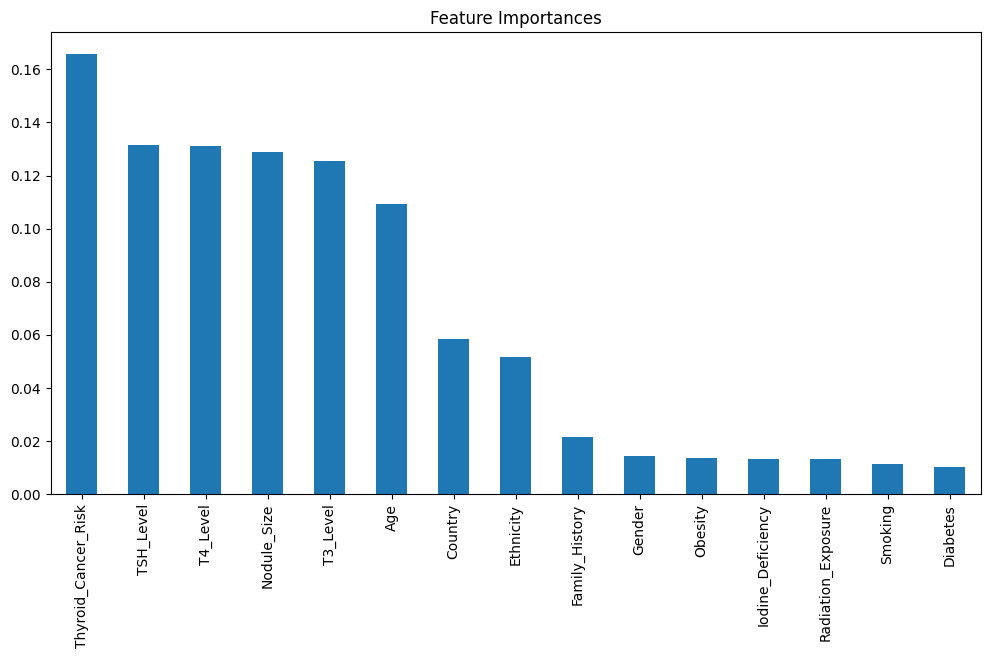

In [80]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind="bar", figsize=(12, 6), title="Feature Importances")


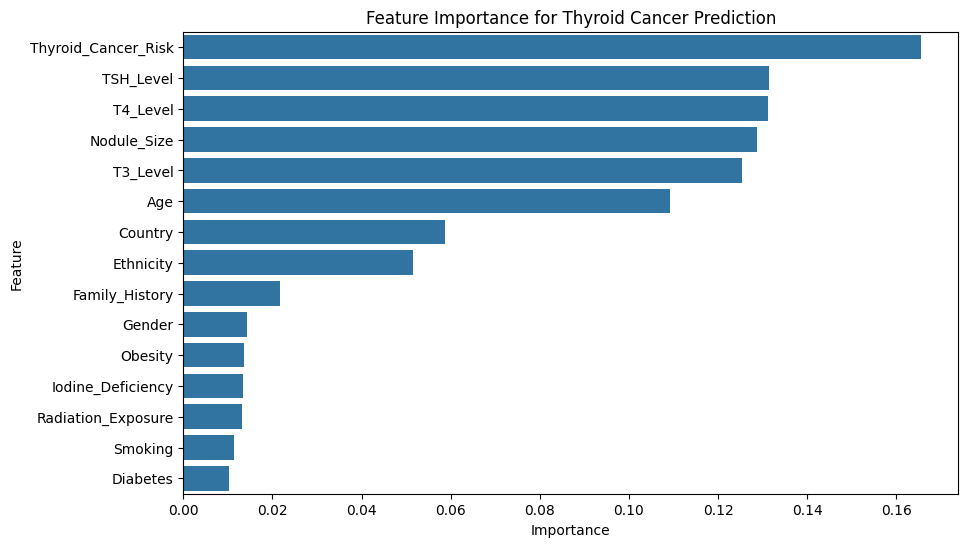

In [81]:
importances = model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance for Thyroid Cancer Prediction")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Best Accuracy:", accuracy_score(y_test, y_pred_best))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
